In [3]:
total_amount=float(input('Enter the total amount\n'))
print('enter the losses for each class \n')
classes=['home_loan','bussiness','credit_card','vehicle']
loss_amount=[]
for i in range(4):
    print('enter the amount not returned in %s'%classes[i])
    loss_amount.append(float(input()))

Enter the total amount
1000
enter the losses for each class 

enter the amount not returned in home_loan
1
enter the amount not returned in bussiness
1
enter the amount not returned in credit_card
1
enter the amount not returned in vehicle
1


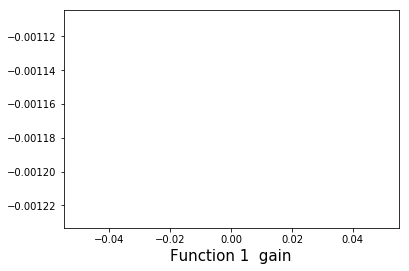

In [16]:
# from nsga2.problem import Problem
from nsga2.evolution import Evolution
import matplotlib.pyplot as plt
import math
def penalty(array):
    boundary_constr = (max(sum(array)-1,0))**2   # "sum x = 1" constraint
    return boundary_constr
def f1(x):
    s = 0
    gain_percent=[0.1118,0.1144,0.1354,0.1433]
    for i in range(len(x)):
        s += gain_percent[i]*x[i]*total_amount
    # retruns the sum of gain from each classes.
    if(sum(x)>1):
        s-=1000+2000*(sum(x)-1)**2
    return 1/s
# we need to maximise the gain but minimise the loss percent
# therfore we are maximising the function f1 and minimising the function 
#variable_classes [w1,w2,w3,w4]     [small_bussiness_loans,'home_loan','credit_cards','auto loans']
#Variable limits [(0.1,0.5),(0,0.5),(0,0.15),(0,0.5)]
problem = Problem(num_of_variables=4, objectives=[f1], variables_range=[(0,1),(0,1),(0,1),(0,1)], expand=False)
evo = Evolution(problem, mutation_param=4,num_of_generations=100)
func = [i.objectives for i in evo.evolve()]
function1 = [i for i in func]
#function2 = [i[1] for i in func]
plt.xlabel('Function 1  gain', fontsize=15)
#plt.ylabel('Function 2  loss', fontsize=15)
plt.plot(function1)
#plt.show()

In [17]:
func

[[-0.0011689079431439582]]

In [18]:
features=evo.evolve()[0].features

In [21]:
features

[0.0004317770736814579,
 0.00015707046885605867,
 0.18007307157991717,
 0.8481020935583795]

In [625]:
1000*0.1118+1000*0.1144+1000*0.1354+1000*0.1433

504.90000000000003

In [626]:
np.sum((np.array(features)*1000)*[0.1118,0.1144,0.1354,0.1433])

154.10940869670398